In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
nltk.download('punkt')

from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:xlabel='target', ylabel='count'>

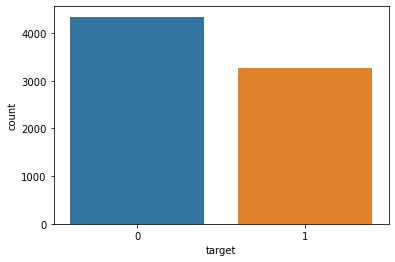

In [5]:
sns.countplot(x='target',data=train)

<AxesSubplot:>

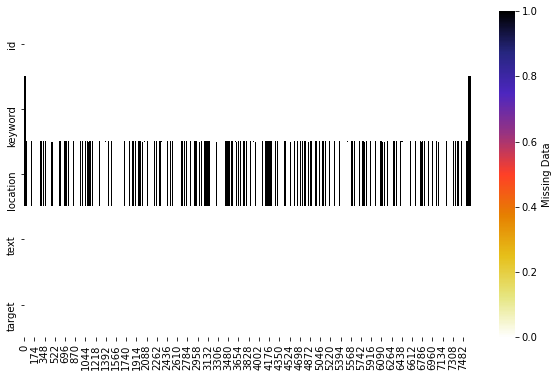

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isna().transpose(),cmap='CMRmap_r',cbar_kws={'label': 'Missing Data'})

In [7]:
keyword_list = train["keyword"].tolist()

In [8]:
# gives set of unique words
unique_words = set(keyword_list)
      
for words in unique_words :
    print('Frequency of ', words , 'is :', keyword_list.count(words))
  

Frequency of  nan is : 61
Frequency of  blizzard is : 37
Frequency of  demolished is : 28
Frequency of  drowning is : 34
Frequency of  ambulance is : 38
Frequency of  dust%20storm is : 36
Frequency of  detonation is : 32
Frequency of  fatalities is : 45
Frequency of  fear is : 40
Frequency of  tsunami is : 34
Frequency of  catastrophic is : 30
Frequency of  destroyed is : 32
Frequency of  drought is : 35
Frequency of  deluged is : 27
Frequency of  floods is : 36
Frequency of  harm is : 41
Frequency of  rubble is : 28
Frequency of  suicide%20bomber is : 31
Frequency of  evacuate is : 40
Frequency of  battle is : 26
Frequency of  flames is : 39
Frequency of  terrorist is : 31
Frequency of  displaced is : 36
Frequency of  riot is : 34
Frequency of  nuclear%20reactor is : 36
Frequency of  sandstorm is : 37
Frequency of  burned is : 33
Frequency of  thunderstorm is : 33
Frequency of  drowned is : 38
Frequency of  forest%20fires is : 32
Frequency of  pandemonium is : 37
Frequency of  siren i

In [9]:
train['keyword'].fillna('fire', inplace = True)
train

,id,keyword,location,text,target
0,1,fire,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,fire,NaN,All residents asked to 'shelter in place' are ...,1
3,6,fire,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,fire,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,fire,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,fire,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,fire,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,fire,NaN,Police investigating after an e-bike collided ...,1


In [10]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text
train['text'] = train['text'].apply(lambda x: clean_tweets(x))
test['text'] = test['text'].apply(lambda x: clean_tweets(x))
test.head(20)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
def clean_text(each_text):

    # tokenize each text
    word_tokens = word_tokenize(each_text)
    
    # remove sptial character
    clean_text = []
    for word in word_tokens:
        clean_text.append("".join([e for e in word if e.isalnum()]))

    # remove stop words and lower
    text_with_no_stop_word = [w.lower() for w in clean_text if not w in stop_words]  

    # do stemming
    ps = PorterStemmer()
    stemmed_text = [ps.stem(w) for w in text_with_no_stop_word]
    
    return " ".join(" ".join(stemmed_text).split())


train['clean_text'] = train['text'].apply(lambda x: clean_text(x) )
train['keyword'] = train['keyword'].fillna("none")
train['clean_keyword'] = train['keyword'].apply(lambda x: clean_text(x) )

In [13]:
# Combine column 'clean_keyword' and 'clean_text' into one
train['keyword_text'] = train['clean_keyword'] + " " + train["clean_text"]

In [14]:
X = "keyword_text"
y = "target"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[X], train[y], test_size = 0.3, random_state = 0, shuffle=True)
print(X_train)

476     attack everyon see ignorancesh latinoand all e...
4854    mass 20murder white peopl i know worri tireles...
4270       heat 20wave chilli heat wave dorito never fail
992               bodi 20bag i skim twitter miss bodi bag
4475    hostag hot c130 special modifi land stadium re...
                              ...                        
4931                mayhem they real hero rip brave heart
3264    engulf car engulf flame back traffic parleyûª ...
1653    collaps great british bake off back dorret cho...
2607    destroy black eye 9 a space battl occur star o...
2732    devast absolut devast actor will miss rossbart...
Name: keyword_text, Length: 5329, dtype: object


In [15]:
# Vectorize text
# Vectorize text
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [17]:
#Apply gradient boostclassifier

model = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=2000, max_depth=9, min_samples_split=6, min_samples_leaf=2, max_features=8, subsample=0.9)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                           min_samples_split=6, n_estimators=2000,
                           subsample=0.9)

In [18]:
# Evaluate the model
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

accuracy = metrics.accuracy_score(predicted, y_test)
print("Test accuracy: ", accuracy)
print(metrics.classification_report(y_test, predicted, target_names=["0", "1"]))
print("Test F-scoare: ", metrics.f1_score(y_test, predicted))

Test accuracy:  0.8134851138353766
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1338
           1       0.82      0.70      0.76       946

    accuracy                           0.81      2284
   macro avg       0.82      0.80      0.80      2284
weighted avg       0.81      0.81      0.81      2284

Test F-scoare:  0.7571265678449259


In [20]:
list1 = [1,2,6,12]
list2 = [12,6,2,1]
print(set(list1) == set(list2))

True
